In [ ]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 06 Day 1
Rik Blok, with thanks to Giulia Toti and Karina Mochetti

---

# Reminders

- **this** Wed-Fri: tutorials drop-in sessions for project help
- Wed: Module 5 (Arbitrary-Sized): Code Review
- Wed: Module 5 (Arbitrary-Sized): Tutorial Submission
- **Thu:** Open office hours for project help in lieu of lecture
- **Fri:** Project Proposal
- **next** Wed-Fri: Module 6 Tutorial Attendance

<div class="alert alert-warning">

### ⚠️  [Project Proposal](https://canvas.ubc.ca/courses/123409/assignments/1615247)
   
**DUE:** Friday Nov 3

* Work with your partner if you formed a team
* You may use provided information source or propose your own
* If you are proposing your own information source: 
    * Information must be in a [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values)
    * Information must be open (i.e., licensed for use in a course project)
    * Needs to be "enough" information, and it must be "complex enough" (e.g., at least three columns and at least 100 rows)
    * Upload the information with your proposal
    * Have in mind one of our provided information sources as a backup plan
* You will need to answer:
    1. What is your information source?
    2. What question or topic do you want to explore?
    3. What graph or chart do you intend to produce?
    4. What substantial computation do you plan to perform?  (E.g., simply filtering the data and then plotting it is **NOT** a substantial computation.)

</div>

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Your progress so far

### How to Design Functions

### 6 Data types and their template functions:
- Simple atomic
- Interval
- Enumeration
- Optional
- Compound
- Arbitrary-size

### The reference rule

But the reference rule is not the only case where helper functions are needed.  In this module we'll explore other cases.

---

# Module learning goals

By the end of this module, you will be able to:

- Design functions that each focus on one task (i.e. that follow the "one task per function" rule). 
- Understand the helper rules.
- Review the reference rule and practice composition. 

---

# Example: One task per function

**Problem 1:** Write a program that turns on the heat in a room if it goes below 20 [Celsius](Celsius), where you have a thermometer that reads [Fahrenheit](https://en.wikipedia.org/wiki/Fahrenheit).

**Solution (with multiple tasks per function):**
```python
def turn_on_heat(f: Fahrenheit) -> bool:
    """
    Returns True if the temperature f (given in Fahrenheit)
    is below 20 Celsius.
    """
    c = (5/9) * (f - 32)  # Task 1: Fahrenheit to Celsius
    return c < 20         # Task 2: Turn on heat?

```

**Problem 2:** Write a program that sounds an alarm if a fridge temperature rises above 7 [Celsius](Celsius), where you have a thermometer that reads [Fahrenheit](https://en.wikipedia.org/wiki/Fahrenheit).

**Solution (with multiple tasks per function):**
```python
def sound_fridge_alarm(f: Fahrenheit) -> bool:
    """
    Returns True if the temperature f (given in Fahrenheit)
    is above 7 Celsius.
    """
    c = (5/9) * (f - 32)  # Task 1: Fahrenheit to Celsius
    return c > 7          # Task 2: Sound alarm?
```

### Benefits of "one task per function"

Why would it not be a good idea to design a program containing both these functions this way.  How could we improve the design?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hints (for your review after class)</summary>
    
Some points to consider:
- Each function performs does multiple, different tasks.  Could we split those tasks into separate functions?
- How could we reuse code if we did separate those tasks?
- Is the temperature conversion code correct?  If there are errors, how would "one task per function" make it easier to debug?
    
    
</details>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: One task per function

Which of the following are reasons for doing one task per function in programming?  Select ALL that apply.  [Set question type to "Multiple Answer".]

<ol style="list-style-type:upper-alpha">
    <li>Separation: Each function is responsible for one specific thing and doesn't need to worry about other unrelated tasks.</li>
    <li>Reusability: Each function can be easily reused in different parts of the code, making it more modular and easier to maintain.</li>
    <li>Fewer functions: Each function does less, so there are fewer functions in the program.</li>
    <li>Performance: Smaller, more focused functions always leads to better performance, as it can avoid the overhead of calling multiple functions.</li>
    <li>Readability: The code becomes more readable and easier to understand. It can also make it easier to debug and test.</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Consider which of the properties are likely to arise from "one task per function".  And which of those properties are benefits for software development.  Consider issues like ease of debugging, maintenance, and understandability. 
    
<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>
    
Reusability, readability, and separation of concerns are commonly cited reasons for only doing one task per function in programming, and are often used to justify the approach. While better performance can sometimes be a reason to combine multiple tasks into a single function, it is **not** a common reason for only doing one task per function. Similarly, reducing the number of functions in the code is **not** necessarily a reason to only do one task per function, as there may be cases where combining multiple tasks in a single function reduces the number of functions needed.
    
</details>
</details>

---

# Helper rules

Each function should have one simple task that it does and it should hand off to other functions any additional tasks.

<div style="margin:auto; width:75%">
    
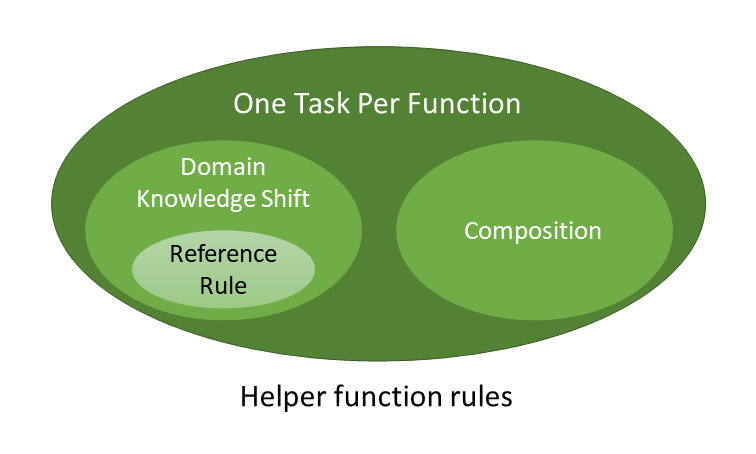

</div>

---

# When is a helper needed?

**Reference:** Use a helper function when making *references* to other non-primitive data definitions (this will be in the template). 

**Knowledge Domain Shift:** Use a helper function if a subtask involves *knowledge* about a type that is not taken as input by this function. 

**Composition:** When your solution is *composed* of multiple, separate operations, use a helper function for each distinct and complete operation that must be performed on the input data. 

---

# Reference

- When we are solving a problem using a non-primitive data `A` and this data contains another non-primitive data `B`. 
- We usually put this in the template.
- Examples:
  - When processing a `List` (non-primitive data) of `Velocity` (non-primitive data).
  - When designing a function for `CD`, a compound data which includes a release `Date` (non-primitive type).

---

# Knowledge domain shift

- The reference rule is a special case of *knowledge domain shift*.
- Other than that, it usually happens when we have a primitive data type representing a more complex data. 
- Usually, when we apply *knowledge domain shift* in this course, it will be through the reference rule.

Let's look at an example...

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Knowledge domain shift

Consider the two alternative functions (below) to construct an annual agenda.  Both represent a month as an integer.  Which of the following handles a knowledge domain shift better?

<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

### (A)
```python
def fill_agenda(a: Agenda,
                month: int) -> ...:
    for ...:
        month = month + 1
        if month == 13:
            month = 1
        add_to_agenda(a, month)
```
    
</div>

<div style="float: left; width: 50%">

### (B)
```python
def fill_agenda(a: Agenda,
                month: int) -> ...:
    for ...:
        month = inc_month(month)
    
    
        add_to_agenda(a, month)
```    
    
</div>

</div>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Our main function is working in the knowledge domain of "agendas".  Should we add code to deal with our knowledge of months in the same function?  Or should we delegate that to a helper function?

Is `month` a non-primitive?  So, does the reference rule apply?

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>

`month` is a primitive so the reference rule doesn't apply to it.  Nevertheless, we are shifting knowledge domains when switching our focus from "agendas" to "months".  So we should delegate the task of processing `month` to a helper function, like `inc_month`.
    
</details>

</details>

---

# Composition
- When we are solving a problem that requires several steps in sequence. 
- We usually want our functions to be small and have a clear purpose. 
- When you see an opportunity to break down a task and delegate a step to a new helper, do it!

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Top-down approach to helper functions

Last class we designed multiple functions using a *top-down* approach.  Below are the steps to take to design a main and helper function with a top-down approach... but the list is scrambled!  

1. Complete the implementation of your main function
2. Test your main function
3. Call the helper function in your main function
4. Design the helper function, including testing
5. Write the helper function stub

You are implementing your main function and realize you need a helper function.  With a top-down approach, in what order should you take the above steps?  Select ALL that apply.  [Set question type to "Multiple Answer".]

<ol style="list-style-type:upper-alpha">
    <li>First step 4, then 1, 3, 5, and finally 2.</li>
    <li>First step 5, then 2, 4, 1, and finally 3.</li>
    <li>First step 3, then 5, 1, 4, and finally 2.</li>
    <li>First step 3, then 1, 5, 4, and finally 2.</li>
    <li>First step 2, then 5, 4, 1, and finally 3.</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Remember, with a top-down approach you mostly work on your main function first, with just a brief diversion to write a helper stub.  You complete the design of the helper after the main function is complete.  But you can't test the main function until all helpers are complete.

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>

Here's the top-down order of the steps (renumbered):

You have finished the stub, examples, and template for the main function.  You are implementing it and find you need a helper function.
    
1. Call the helper function in your main function
2. Then do the following two steps, in either order:
    - Write the helper function stub
    - Complete the implementation of your main function
4. Design the helper function, including testing
5. Test your main function

</details>

</details>

---

# Exercise: `EpisodeDuration` with composition

The data below represents the length of episodes from a TV show, in minutes. We have examples for only one episode of a show (Friends), a full season of a show (Game of Thrones), and a whole show (The Good Place).

In [ ]:
from typing import List

EpisodeDurations = List[float] # in range [0, ...]
# interp. the duration of episodes in minutes for some number of 
# episodes of a TV Show

ED0 = []
ED_FRIENDS_S01E01 = [22.8]
ED_GAME_OF_THRONES_S01 = [61.62, 55.28, 57.23, 55.62, 54.27, 52.6, 
                          57.79, 58.13, 56.27, 52.62]
ED_GOOD_PLACE = [
    26.27, 21.50, 24.90, 22.55, 26.30, 26.35, 24.23, 25.23, 24.88, 
    23.78, 26.62, 21.53, 26.88, 42.68, 21.60, 23.92, 25.37, 24.65, 
    23.28, 23.72, 21.60, 24.78, 22.77, 23.47, 24.33, 21.60, 21.55, 
    21.60, 21.60, 21.60, 21.53, 21.55, 21.53, 21.53, 22.53, 21.53, 
    21.53, 21.53, 22.42, 21.40, 21.42, 21.43, 21.43, 21.42, 21.42, 
    21.40, 21.42, 21.42, 21.45, 21.43, 52.48
]

# template based on arbitrary-sized
@typecheck
def fn_for_ed(ed: EpisodeDurations) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for duration in ed:
        acc = ...(duration, acc)

    return ...(acc)



## Original problem and solution from Module 05b Day 2

**Problem:** Design a function that finds the average duration (in minutes) of all episodes in an `EpisodeDurations` list.

Recall, we already solved this problem in **Module05b-day2** (see cell below).  But our solution implemented two tasks in one function, making it a bit hard to read and maintain.

---

## Solution from Module 05b Day 2

In [ ]:
# Solution from Module 05b Day 2

@typecheck
def avg_episode_duration(ed: EpisodeDurations) -> float:
    """
    Return the average duration (in minutes) of the episodes in ed.
    
    (The average duration of zero episodes is returned as 0.)
    """
    # return 0.0  #stub
    # Template from EpisodeDurations
    
    # sum of episode durations so far
    total = 0.0   # type: float

    # count of episodes so far
    count = 0   # type: int

    for duration in ed:
        # acc = ...(duration, total, count)
        total = total + duration
        count = count + 1

    if count == 0:
        return 0
    
    return total / count


start_testing()

expect(avg_episode_duration([]), 0.0)
expect(avg_episode_duration([1, 1, 1, 1, 1]), 1)
expect(avg_episode_duration([100.12, 12.1]), (100.12+12.1)/2)
expect(avg_episode_duration(ED_GAME_OF_THRONES_S01), 
       (61.62+55.28+57.23+55.62+54.27+52.6+57.79+58.13+56.27+52.62)/10
      )
expect(avg_episode_duration(ED_FRIENDS_S01E01), 22.8)

summary()



---

## One task per function solution via composition

Let's tackle the problem again but with the "one task per function" principle, using our newly-learned *composition* rule.

We'll see how we split the steps in the task into separate helper functions.

---

## Composition steps?

Let's work out what steps we'll need to take to compose our solution:

In [ ]:
# Steps:
# 1. 
# 2. 
# 3. 
# 4. 

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Solution (for your review after class)</summary>

```python
# Steps:
# 1. Compute the sum of episode durations
# 2. Count the number of episodes in list
# 3. If no episodes, return 0.  Otherwise...
# 4. Return the average duration as total / count
```
    
</details>

---

## Space reserved for helper functions
We'll start by designing our main function below, but leave space for our helpers here.

In [ ]:
# TODO: Add any added/changed helper functions here after designing the main function below



In [ ]:
# TODO: Add any added/changed helper functions here after designing the main function below



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Helper functions solution (for your review after class)</summary>
    
#### Helper function `sum_durations` (designed after main function below)
```python
@typecheck
def sum_durations(ed: EpisodeDurations) -> float:
    """
    Returns the sum of the episode durations in ed.
    """
    # return -1.0 # stub

    # Template from EpisodeDurations
    # sum of episode durations
    total = 0.0   # type: float

    for duration in ed:
        # acc = ...(duration, total)
        total = total + duration

    return total

        
start_testing()

expect(sum_durations([]), 0.0)
expect(sum_durations([1, 1, 1, 1, 1]), 5)
expect(sum_durations([100.12, 12.1]), (100.12+12.1))
expect(sum_durations(ED_GAME_OF_THRONES_S01), 
       (61.62+55.28+57.23+55.62+54.27+52.6+57.79+58.13+56.27+52.62)
      )
expect(sum_durations(ED_FRIENDS_S01E01), 22.8)

summary()
```
    
#### Helper function `count_episodes` (designed after main function below)
```python
@typecheck
def count_episodes(ed: EpisodeDurations) -> int:
    """
    Returns the number of episodes in id.
    """
    # return -1 # stub

    # Template from EpisodeDurations
    # count of episodes
    count = 0   # type: int

    for duration in ed:
        # acc = ...(duration, count)
        count = count + 1
    
    return count


start_testing()

expect(count_episodes([]), 0)
expect(count_episodes([1, 1, 1, 1, 1]), 5)
expect(count_episodes([100.12, 12.1]), 2)
expect(count_episodes(ED_GAME_OF_THRONES_S01), 10)
expect(count_episodes(ED_FRIENDS_S01E01), 1)

summary()
```
    
</details>

---

## Main function
Let's use a top-down approach to design our function.  We begin with the main function.

In [ ]:
# begin by copy/pasting solution from Module05b-day2



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Main function solution (for your review after class)</summary>
    
Here are the changes we made to use composition:
1. We split the task into steps.
2. We called a helper function for each step.
3. We designed the helper functions, including tests.
4. We tested our main function.
    
Note that our main function is now based on composition instead of the input data type.

    
#### Main function `avg_episode_duration`
```python
@typecheck
def avg_episode_duration(ed: EpisodeDurations) -> float:
    """
    Return the average duration (in minutes) of the episodes in ed.
    
    (The average duration of zero episodes is returned as 0.)
    """
    # return 0.0  #stub

    # Template based on composition
    
    # Steps:
    # 1. Compute the sum of episode durations
    # 2. Count the number of episodes in list
    # 3. If no episodes, return 0.  Otherwise...
    # 4. Return the average duration as total / count
  
    total = sum_durations(ed)
    count = count_episodes(ed)
    if count == 0:
        return 0
    return total / count


start_testing()

expect(avg_episode_duration([]), 0.0)
expect(avg_episode_duration([1, 1, 1, 1, 1]), 1)
expect(avg_episode_duration([100.12, 12.1]), (100.12+12.1)/2)
expect(avg_episode_duration(ED_GAME_OF_THRONES_S01), 
       (61.62+55.28+57.23+55.62+54.27+52.6+57.79+58.13+56.27+52.62)/10
      )
expect(avg_episode_duration(ED_FRIENDS_S01E01), 22.8)

summary()
```
    
</details>

---